# Figure out where and how precursor features are generated

1. Figure out where and how precursor features are **written**

In [1]:
import pandas as pd
import re 
import pysam
import numpy as np
import os
import mirge.forgi.graph.bulge_graph as fgb
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
precusorStrFile = 'output_dir/miRge.2022-04-26_12-04-16/unmapped_tmp/SRR772403_precursor.str'

In [4]:
with open(precusorStrFile, 'r') as inf2:
    totalContent = inf2.readlines()
    totalContentSplit = chunks(totalContent, 3)
    for item in totalContentSplit:
        precusorName = item[0].strip()[1:]
        precusorSeq = item[1].strip()
        precusorStr = item[2].strip().split()[0]
        try:
            if len(item[2].strip().split()[1]) >= 3:
                mfeValue = float(item[2].strip().split()[1][1:-1].strip())
            else:
                mfeValue = float(item[2].strip().split()[2][:-1].strip())
        except:
            mfeValue = 0.0

In [5]:
precusorName

'SRR772403:miRCluster_206_23:chrX:66018937_66018959+:precusor_2'

In [6]:
precusorSeq

'GGACACUCCAUGUGGUAGAGUGUCAGUUUGUCAAAUACCCCAAGUGCGGCACAUGCUUACCAGCUCUAGGCCAGGGCAGAUGGGAUAUGACGAAUGGACUGCCAGCUGGA'

In [7]:
precusorStr

'......((((..(((((....(((.((((((((..((.((((..((((((....(((....))).....)))...)))..)))).)))))))))).))))))))..))))'

In [8]:
len(totalContentSplit)

184

In [9]:
item[0].strip()

'>SRR772403:miRCluster_206_23:chrX:66018937_66018959+:precusor_2'

In [10]:
help(str.strip)

Help on method_descriptor:

strip(self, chars=None, /)
    Return a copy of the string with leading and trailing whitespace removed.
    
    If chars is given and not None, remove characters in chars instead.



In [11]:
%%bash
head output_dir/miRge.2022-04-26_12-04-16/unmapped_tmp/SRR772403_precursor.str

>SRR772403:miRCluster_4_24:chr1:40754371_40754394+:precusor_1
UCUGUCACCUCCUUACUAGAGUAGGGUGUGCCUCACUGCGUCUCCGUUCUUUCUGGGCAGUCUUUGCUACUGUAAACAUCCUUGACUGGAAGCUGUAAGGUGUUCAGAG
((((.(((((..((((.(((((((((..(((((....(((....))).......)))))..))))))).))))))((((((......)))...))).)))))..)))). (-29.70)
>SRR772403:miRCluster_4_24:chr1:40754371_40754394+:precusor_2
UUCUGGGCAGUCUUUGCUACUGUAAACAUCCUUGACUGGAAGCUGUAAGGUGUUCAGAGGAGCUUUCAGUCGGAUGUUUACAGCGGCAGGCUGCCACGGUCGUCCCCAG
..(((((((((((..(((.((((((((((((..(((((((((((................))))))))))))))))))))))).))))))))))).))).......... (-54.10)
>SRR772403:miRCluster_5_22:chr1:40754413_40754434+:precusor_1
UCCGUUCUUUCUGGGCAGUCUUUGCUACUGUAAACAUCCUUGACUGGAAGCUGUAAGGUGUUCAGAGGAGCUUUCAGUCGGAUGUUUACAGCGGCAGGCUGCCACGGUCGU
..........(((((((((((..(((.((((((((((((..(((((((((((................))))))))))))))))))))))).))))))))))).))).... (-54.10)
>SRR772403:miRCluster_5_22:chr1:40754413_40754434+:precusor_2


In [18]:
premiRNASeq = "UCACAGGGCUUUGUGUUCUGCUCCCCCUCUCUAAUCCUUGCUACCUGGGUGAGAGUGCUGUCUGAAUGCAAUGCACCUGGGCAAGGAUUCUGAGAGCGAGAGCUUCAUCUU"
premiRNAStructure = "....(((((.....)))))((((...(((((.(((((((((...(((((((....(((.........)))...))))))))))))))))..)))))...))))........"


In [19]:
bg1 = fgb.BulgeGraph()
fa = '\n'.join(['>PrecusorStr', premiRNASeq, premiRNAStructure])
bg1.from_fasta(fa)

In [20]:
hairpinCount = 0
interiorLoopCount = 0
for string in bg1.to_bg_string().strip().split('\n'):
    if 'define' in string:
        contentTmp = string.split(' ')
        elementType = contentTmp[1]
        if elementType[0] == 'h':
            hairpinCount = hairpinCount + 1
        if elementType[0] == 'i':
            interiorLoopCount = interiorLoopCount + 1

In [21]:
print(bg1.to_bg_string())

name PrecusorStr
length 111
seq UCACAGGGCUUUGUGUUCUGCUCCCCCUCUCUAAUCCUUGCUACCUGGGUGAGAGUGCUGUCUGAAUGCAAUGCACCUGGGCAAGGAUUCUGAGAGCGAGAGCUUCAUCUU
seq_ids 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111
define f1 1 4
define s0 5 9 15 19
define h0 10 14
define s1 20 23 100 103
define m0 
define i0 24 26 97 99
define s2 27 31 92 96
define i1 32 32 90 91
define s3 33 41 81 89
define i2 42 44
define s4 45 51 74 80
define i3 52 55 71 73
define s5 56 58 68 70
define h1 59 67
define t1 104 111
connect s0 f1 h0 m0
connect s1 i0 t1 m0
connect s2 i0 i1
connect s3 i1 i2
connect s4 i3 i2
connect s5 i3 h1



In [22]:
hairpinCount

2

UCUGUCACCUCCUUACUAGAGUAGGGUGUGCCUCACUGCGUCUCCGUUCUUUCUGGGCAGUCUUUGCUACUGUAAACAUCCUUGACUGGAAGCUGUAAGGUGUUCAGAG
((((.(((((..((((.(((((((((..(((((....(((....))).......)))))..))))))).))))))((((((......)))...))).)))))..)))). (-29.70)

# Below I've pasted content of the featuresInPrecusor method

In [28]:
bg = fgb.BulgeGraph()
fa = '\n'.join(['>prunedPrecursorStr', premiRNASeq, premiRNAStructure])
bg.from_fasta(fa)
bindingCount1 = 0
bindingCount2 = 0
for item in premiRNAStructure:
    if item == '(' :
        bindingCount1 = bindingCount1 + 1
    if item == ')' :
        bindingCount2 = bindingCount2 + 1
# Calculate bindingCount in the CorePrecusor
bindingCount = max([bindingCount1, bindingCount2])
# Calculate the hairpinCount and interiorLoopCount
hairpinCount = 0
interiorLoopCount = 0
for string in bg.to_bg_string().strip().split('\n'):
    if 'define' in string:
        contentTmp = string.split(' ')
        elementType = contentTmp[1]
        if elementType[0] == 'h':
            hairpinCount = hairpinCount + 1
        if elementType[0] == 'i':
            interiorLoopCount = interiorLoopCount + 1
# Calculate apicalLoopSize of the CorePrecusor
# To get compatible with the older version of forgi, the below statement is abandoned.
#elementTypeSeq, indeSeq = bg.to_element_string(with_numbers=True).split('\n')
elementTypeSeq, indeSeq = to_element_string(bg, with_numbers=True).split('\n')

elementIndexList = [elementTypeSeq[i]+indeSeq[i] for i in range(len(elementTypeSeq))]
elementSeqList = []
elementlocationList = []
# the position is 0-based
for index, item in enumerate(elementIndexList):
    if len(elementlocationList) == 0:
        elementSeqList.append(item)
        elementlocationList.append([index, index])
    elif item != elementSeqList[-1]:
        elementSeqList.append(item)
        elementlocationList.append([index, index])
    else:
        elementlocationList[-1][1] = index
elementDic = {}
for i in range(len(elementSeqList)):
    if elementSeqList[i] not in elementDic.keys():
        elementDic.update({elementSeqList[i] : [elementlocationList[i]]})
    else:
        elementDic[elementSeqList[i]].append(elementlocationList[i])
hairpinRagion = []
for d in elementDic.keys():
    if d[0] == 'h':
        hairpinRagion = hairpinRagion + elementDic[d]
if len(hairpinRagion) >= 1:
    apicalLoopSize = max([len(range(item[0], item[1]+1)) for item in hairpinRagion])
else:
    apicalLoopSize = 0
# Calculate the overlap of miRNA with the hairpin
# startPos and endPos are the locations of the miRNA in the corePrecusor. 0-based
startPos, endPos = getMiRNAPosition(miRNASeq, premiRNASeq)
endPos = endPos - 1
if len(hairpinRagion) >= 1:
    overlapLen = max([len(set(range(startPos, endPos+1)) & set(range(item[0], item[1]+1))) for item in hairpinRagion])
else:
    overlapLen = 0
armType = 'arm5'
if overlapLen == 0:
    if armType == 'arm5':
        distanceToLoop = min([item[0]-1-endPos for item in hairpinRagion])
    else:
        distanceToLoop = min([startPos-item[1]-1 for item in hairpinRagion])
else:
    for item in hairpinRagion:
        if len(set(range(startPos, endPos+1)) & set(range(item[0], item[1]+1))) == overlapLen:
            if armType == 'arm5':
                distanceToLoop = item[0]-1-endPos
            else:
                distanceToLoop = startPos - item[1] - 1
            break
# armTypeOverlenDic.update({armType: [overlapLen, distanceToLoop]})
# if len(self.miRNASeq) == 2:
#     armType2 = checkArm(self.premiRNASeq, self.premiRNAStructure, self.miRNASeq[1])
#     startPos2, endPos2 = getMiRNAPosition(self.miRNASeq[1], self.premiRNASeq)
#     endPos2 = endPos2 - 1
#     if len(hairpinRagion) >= 1:
#         overlapLen2 = max([len(set(range(startPos2, endPos2+1)) & set(range(item[0], item[1]+1))) for item in hairpinRagion])
#     else:
#         overlapLen2 = 0
#     if overlapLen2 == 0:
#         if armType2 == 'arm5':
#             distanceToLoop2 = min([item[0]-1-endPos2 for item in hairpinRagion])
#         else:
#             distanceToLoop2 = min([startPos2-item[1]-1 for item in hairpinRagion])
#     else:
#         for item in hairpinRagion:
#             if len(set(range(startPos2, endPos2+1)) & set(range(item[0], item[1]+1))) == overlapLen2:
#                 if armType2 == 'arm5':
#                     distanceToLoop2 = item[0]-1-endPos2
#                 else:
#                     distanceToLoop2 = startPos2 - item[1]-1
#                 break
#     armTypeOverlenDic.update({armType2: [overlapLen2, distanceToLoop2]})
# Calculate the stem length of precusor.
stemLen = 0
for d in elementDic.keys():
    if d[0] == 's':
        stemLen = stemLen + max([item[1]+1-item[0] for item in elementDic[d]])
# Check whether apical UGU/UGUG motif exist in hairpin region
flag = 'No'
for d in elementDic.keys():
    if d[0] == 'h':
        for item in elementDic[d]:
            seqTmp = self.premiRNASeq[item[0]:item[1]]
            if 'UGU' in seqTmp or 'UGUG' in seqTmp:
                flag = 'Yes'
                break
# pair state
if len(self.miRNASeq) == 2:
    pairState = 'Yes'
else:
    pairState = 'No'
    
return (hairpinCount, bindingCount, interiorLoopCount, armType, apicalLoopSize, armTypeOverlenDic, stemLen, flag, self.mfe, pairState)

NameError: name 'miRNASeq' is not defined

In [24]:
def to_element_string(bulgeGraphInstance, with_numbers=False):
	output_str = [' '] * (bulgeGraphInstance.seq_length + 1)
	output_nr = [' '] * (bulgeGraphInstance.seq_length + 1)
	for d in bulgeGraphInstance.defines.keys():
		for resi in bulgeGraphInstance.define_residue_num_iterator(d, adjacent=False):
			output_str[resi] = d[0]
			output_nr[resi] = d[-1]
	if with_numbers:
		return "".join(output_str).strip()+"\n"+"".join(output_nr).strip()
	else:
		return "".join(output_str).strip()

In [27]:
def getMiRNAPosition(miRNASeq, RNASequence):
	startPos = RNASequence.find(miRNASeq)
	endPos = startPos + len(miRNASeq)
	return [startPos, endPos]

#get miRNA structure
def getMiRNAStructure(miRNASeq, RNASequence, RNAStructure):
	[startPos, endPos] = getMiRNAPosition(miRNASeq, RNASequence)
	mirnaStruct = RNAStructure[startPos:endPos]
	return mirnaStruct


# Here starts our feature-generating code. 

In [6]:
# here we add 5 to the front and 3 to the back to try to get out miRNA seq to look like theirs for a specific cluster. Also, take reverse complement. 

In [15]:
hg38.fetch(region=region)

OverflowError: value too large to convert to int32_t

In [36]:
def reverse_complement(sequence):
    pairs = {'A':'T', 'C':'G', 'G':'C', 'T':'A'}
    new_seq = []
    for base in sequence[::-1]:
        new_seq.append(pairs[base])
    return ''.join(new_seq)

def lookup_in_hg38(strand, region, hg38):    
    chr_ = re.search('chr[^:]*', region).group(0)
    start = int(re.search('(?<=:)[0-9]*(?=_)', region).group(0))
    end = int(re.search('(?<=_)[0-9]*$', region).group(0))
    mirna_region = chr_ + ':' + str(start) + '-' + str(end)
    precursor_1_region = chr_ + ':' + str(int(start) - 70) + '-' + str(int(end) + 20)
    precursor_2_region = chr_ + ':' + str(int(start) - 20) + '-' + str(int(end) + 70)
    try:
        # don't substitute U! 
        if strand == '+':
            miRNA_seq = re.sub('T', 'T', hg38.fetch(region=mirna_region))
            precursor_1 = hg38.fetch(region=precursor_1_region)
            precursor_2 = hg38.fetch(region=precursor_2_region)
        else:
            miRNA_seq = reverse_complement(re.sub('T', 'T', hg38.fetch(region=mirna_region)))
            precursor_1 = reverse_complement(hg38.fetch(region=precursor_1_region))
            precursor_2 = reverse_complement(hg38.fetch(region=precursor_2_region))
    except:
        return [region] + [None] * 6
    return np.array([region, miRNA_seq, precursor_1, precursor_2, chr_, start, end])

In [37]:
reverse_complement('AAACCTGG')

'CCAGGTTT'

In [38]:
hg38 = pysam.Fastafile('hg38/GRCh38.d1.vd1.fa')

In [39]:
region = 'chrX:50008481_50008504'

lookup_in_hg38(strand = '-', region=region, hg38=hg38)

array(['chrX:50008481_50008504', 'TCAGAATCCTTGCCCAGGTGCATT',
       'CGAAGATGAAGCTCTCGCTCTCAGAATCCTTGCCCAGGTGCATTGCATTCAGACAGCACTCTCACCCAGGTAGCAAGGATTAGAGAGGGGGAGCAGAACACAAAGCCCTGTGAA',
       'AATACTTGTGGAATGGATGATAGGAGGACAGAAAGACGCTCTGTCCTACACGAAGATGAAGCTCTCGCTCTCAGAATCCTTGCCCAGGTGCATTGCATTCAGACAGCACTCTCA',
       'chrX', '50008481', '50008504'], dtype='<U114')

In [40]:
df = pd.read_csv('one_cluster_per_annotation/one_cluster_per_annotation.csv').drop('Unnamed: 0', axis=1)

In [52]:
df['region']

0       chr16:69933102_69933125
1       chr17:17813897_17813916
2      chr7:130496161_130496184
3          chr7:1022989_1023012
4        chr5:88666863_88666887
                 ...           
873      chr4:32728718_32728734
874    chr8:143915986_143916008
875    chr9:104928094_104928109
876    chr1:228288280_228288303
877     chr15:43531393_43531420
Name: region, Length: 878, dtype: object

In [59]:
df['headUnstableLength'].mean()

1.9453302961275627

In [54]:
def adjust_by_unstable_length(row):
    region = row['region']
    strand = row['strand']
    chr_ = re.search('chr[^:]*', region).group(0)
    start = int(re.search('(?<=:)[0-9]*(?=_)', region).group(0))
    end = int(re.search('(?<=_)[0-9]*$', region).group(0))
    if row['strand'] == '+':
        stable_start = start + row['headUnstableLength']
        stable_end = end - row['tailUnstableLength'] 
    else:
        stable_start = start + row['tailUnstableLength'] 
        stable_end = end - row['headUnstableLength'] 
    row['stable_region'] = chr_ + ':' + stable_start + '_' + stable_end
    return row

In [55]:
df['region'] = [re.search('chr.*', cn).group(0)[:-1] for cn in df['clusterName']]

In [56]:
df['strand'] = [cn[-1] for cn in df['clusterName']]

In [58]:
df['headUnstableLength'] 
df['tailUnstableLength']

KeyError: 'tailUnstableLength'

In [57]:
df = df.apply(adjust_by_unstable_length, axis=1)

KeyError: 'tailUnstableLength'

In [43]:
sequences = []
for strand, region in zip(df['strand'], df['region']):
    sequences.append(lookup_in_hg38(strand, region, hg38))
seq_df = pd.DataFrame(np.array(sequences), columns=['region', 'miRNA_seq', 'precursor1_seq', 'precursor2_seq', 'chr', 'start', 'end'])

In [44]:
set(seq_df['region'].values == df['region'].values)

{True}

In [45]:
seq_df

,region,miRNA_seq,precursor1_seq,precursor2_seq,chr,start,end
0,chr16:69933102_69933125,CCAGTGGTTTTACCCTATGGTAGG,TCCTCTCCAGGCTCTGCTTGGTGGGCTTCTGGTGTGGCCGCGCCCT...,GTGTCTCTCTCTGTGTCCTGCCAGTGGTTTTACCCTATGGTAGGTT...,chr16,69933102,69933125
1,chr17:17813897_17813916,GTGCATTGCTGTTGCATTGC,GAGAGGCGGGCGGCCCCGCGGTGCATTGCTGTTGCATTGCACGTGT...,CAGGAGGGCTGGACAGCTGCTCCCGGGCCGGTGGCGGGTGTGGGGG...,chr17,17813897,17813916
2,chr7:130496161_130496184,GTTTTTCATTATTGCTCCTGACCT,GAAACAGATTGGAAATGATTTGTTTTGAGCGGGGGTCAAGAGCAAT...,AAAAATGTTTGTCATAAACCGTTTTTCATTATTGCTCCTGACCTCC...,chr7,130496161,130496184
3,chr7:1022989_1023012,TCCCTGTCCTCCAGGAGCTCACGT,CAGGGGCGGGGCGGCCGCTCTCCCTGTCCTCCAGGAGCTCACGTGT...,AGGAAGCGTCCCATGCTCTGCAGGGGTGGCAGGAAGCGTCCTGTGC...,chr7,1022989,1023012
4,chr5:88666863_88666887,ATAAAGCTAGATAACCGAAAGTAAA,GTATGAGTGTATTGGTCTTCATAAAGCTAGATAACCGAAAGTAAAA...,AAGACAGAGGCCTGTGTGGGAAGCGAGTTGTTATCTTTGGTTATCT...,chr5,88666863,88666887
...,...,...,...,...,...,...,...
873,chr4:32728718_32728734,AAGTGAATGATTAGAGG,CATGAGGAGTACTAGGCACTAAGTGAATGATTAGAGGGAGTTAACA...,ATGTTAATTTCCCCAAAAAATGAGACACTCATTCTAATGTAGGGCT...,chr4,32728718,32728734
874,chr8:143915986_143916008,TCTTGGGGGACAGGGCTGGCCCA,TGCTGTCCAGACAGCCTGTATCTTGGGGGACAGGGCTGGCCCAGCC...,GGTGCCTAAAGTTTAACCAAAAAGACCAGACTAATATATTAATATA...,chr8,143915986,143916008
875,chr9:104928094_104928109,GGGAGAGAAGGGTCGG,AAGGAGCAAAGCGCCCTGAGAACCGGCTCTGTTGGTGCGCGGAGCT...,GCCCTGCCCTGCCGCAGCCCGGGAGAGAAGGGTCGGCTCGGCTCTG...,chr9,104928094,104928109
876,chr1:228288280_228288303,GTGTGTGTGGAGAGGAGAGGACCT,AGGCAGGACGGGGCCATGTGTGAGCTGCAGATCCGTGGCCTGGCCA...,GGATGCCGCGGAGTACTCGTGTGTGTGTGGAGAGGAGAGGACCTCA...,chr1,228288280,228288303


In [46]:
df[['miRNA_seq', 'precursor1_seq', 'precursor2_seq', 'chr', 'start', 'end']] = seq_df[['miRNA_seq', 'precursor1_seq', 'precursor2_seq', 'chr', 'start', 'end']]

This works!

In [26]:
miRNA_seq, precursor_seq = df['miRNA_seq'].values[0], df['precursor1_seq'].values[0]

In [27]:
def getMiRNAPosition(miRNASeq, RNASequence):
    startPos = RNASequence.find(miRNASeq)
    endPos = startPos + len(miRNASeq)
    return [startPos, endPos]

#get miRNA structure
def getMiRNAStructure(miRNASeq, RNASequence, RNAStructure):
    [startPos, endPos] = getMiRNAPosition(miRNASeq, RNASequence)
    mirnaStruct = RNAStructure[startPos:endPos]
    return mirnaStruct

def bindingsInMiRNA(miRNA_sequence, precursor_sequence, precursor_structure):
    miRNAStr = getMiRNAStructure(miRNA_sequence, precursor_sequence, precursor_structure)
    countBindingsInMiRNA = miRNAStr.count('(')+miRNAStr.count(')')
    return countBindingsInMiRNA


def getMirnaIncludedInLoop(RNASequence, RNAStructure, miRNASeq):
    flag = False
    mirnaStruct = getMiRNAStructure(miRNASeq, RNASequence, RNAStructure)
    #bg2 = fgb.BulgeGraph()
    #fa2 = '\n'.join(['>miRNAStr', miRNASeq, mirnaStruct])
    #bg2.from_fasta(fa2)
    #for i in range(1, len(miRNASeq)+1):
    #	if bg2.pairing_partner(i)
    pattern = re.compile("\(.*\)")
    pattern.search(mirnaStruct)
    if(('(' in mirnaStruct) and (')' in mirnaStruct)):
        if pattern.search(mirnaStruct) is None:
            pass
        else:
            flag = True
    return flag

def checkArm(RNASequence, RNAStructure, miRNASeq):
    armDetailedType = ''
    if(getMirnaIncludedInLoop(RNASequence, RNAStructure, miRNASeq)):
        armDetailedType = 'loop'
    #check arms
    else:
        mirnaStruct = getMiRNAStructure(miRNASeq, RNASequence, RNAStructure)
        if '(' in mirnaStruct :
            if mirnaStruct.count('(') >= mirnaStruct.count(')'):
                armDetailedType = 'arm5'
            else:
                armDetailedType = 'arm3'
        elif ')' in mirnaStruct :
            if mirnaStruct.count(')') >= mirnaStruct.count('('):
                armDetailedType = 'arm3'
            else:
                armDetailedType = 'arm5'
        else:
            armDetailedType = 'unmatchedRegion'
    return armDetailedType

def chunks(arr, n):
    return [arr[i:i+n] for i in range(0, len(arr), n)]

In [28]:
def to_element_string(bulgeGraphInstance, with_numbers=False):
    output_str = [' '] * (bulgeGraphInstance.seq_length + 1)
    output_nr = [' '] * (bulgeGraphInstance.seq_length + 1)
    for d in bulgeGraphInstance.defines.keys():
        for resi in bulgeGraphInstance.define_residue_num_iterator(d, adjacent=False):
            output_str[resi] = d[0]
            output_nr[resi] = d[-1]
    if with_numbers:
        return "".join(output_str).strip()+"\n"+"".join(output_nr).strip()
    else:
        return "".join(output_str).strip()

def make_element_dic(bg):
    elementTypeSeq, indeSeq = to_element_string(bg, with_numbers=True).split('\n')
    elementIndexList = [elementTypeSeq[i]+indeSeq[i] for i in range(len(elementTypeSeq))]
    elementSeqList = []
    elementlocationList = []
    # the position is 0-based
    for index, item in enumerate(elementIndexList):
        if len(elementlocationList) == 0:
            elementSeqList.append(item)
            elementlocationList.append([index, index])
        elif item != elementSeqList[-1]:
            elementSeqList.append(item)
            elementlocationList.append([index, index])
        else:
            elementlocationList[-1][1] = index
    elementDic = {}
    for i in range(len(elementSeqList)):
        if elementSeqList[i] not in elementDic.keys():
            elementDic.update({elementSeqList[i] : [elementlocationList[i]]})
        else:
            elementDic[elementSeqList[i]].append(elementlocationList[i])
    return elementDic

In [29]:
def write_fasta(precursor_sequence):
    with open('precursor.fa', 'w') as precursor_fasta:
        precursor_fasta.write(precursor_sequence)
    return None

def get_mFE(precursor_seq):
    write_fasta(precursor_seq)
    os.system('rnafold < precursor.fa --noPS --noLP > precursor.str')
    with open('precursor.str', 'r') as precursor:
        precursor_lines = precursor.readlines()
        # print(precursor_lines)
        if '0.00' in precursor_lines[1]:
            return 0
        else:
            try:
                mFE = float(re.search('-.*(?=\)\n)', precursor_lines[1]).group(0))
            except:
                print(precursor_lines)
                print('BROKEN')
                print(re.sub('(\n|\(|\))', '', precursor_lines[1].split(' ')[1]))
    return mFE
        
def fold_and_filter_precursor(miRNA_seq, precursor_seq):
    write_fasta(precursor_seq)
    os.system('rnafold < precursor.fa --noPS --noLP > precursor.str')
    with open('precursor.str', 'r') as precursor:
        precursor_structure = precursor.readlines()[1].split(' ')[0]
    bg = fgb.BulgeGraph()
    fa = '\n'.join(['>prunedPrecursorStr', precursor_seq, precursor_structure])
    bg.from_fasta(fa)
    return bg

def get_stem_length(elementDic):
    stemLen = 0
    for d in elementDic.keys():
        if d[0] == 's':
            stemLen = stemLen + max([item[1]+1-item[0] for item in elementDic[d]])
    return stemLen

def get_distance_to_loop(elementDic, armType, miRNA_seq, precursor_seq, precursor_structure):
    # taken directly from mirge/classes/readPrecusor.py 
    hairpinRagion = []
    for d in elementDic.keys():
        if d[0] == 'h':
            hairpinRagion = hairpinRagion + elementDic[d]
    if len(hairpinRagion) >= 1:
        apicalLoopSize = max([len(range(item[0], item[1]+1)) for item in hairpinRagion])
    else:
        apicalLoopSize = 0
    armTypeOverlenDic = {}
    # Calculate the armType of the miRNA
    armType = checkArm(miRNA_seq, precursor_seq, precursor_structure)
    # Calculate the overlap of miRNA with the hairpin
    # startPos and endPos are the locations of the miRNA in the corePrecusor. 0-based
    startPos, endPos = getMiRNAPosition(miRNA_seq, precursor_structure)
    endPos = endPos - 1
    if len(hairpinRagion) >= 1:
        overlapLen = max([len(set(range(startPos, endPos+1)) & set(range(item[0], item[1]+1))) for item in hairpinRagion])
    else:
        overlapLen = 0
    if overlapLen == 0:
        if armType == 'arm5':
            distanceToLoop = min([item[0]-1-endPos for item in hairpinRagion])
        else:
            distanceToLoop = min([startPos-item[1]-1 for item in hairpinRagion])
    else:
        for item in hairpinRagion:
            if len(set(range(startPos, endPos+1)) & set(range(item[0], item[1]+1))) == overlapLen:
                if armType == 'arm5':
                    distanceToLoop = item[0]-1-endPos
                else:
                    distanceToLoop = startPos - item[1] - 1
                break
    return distanceToLoop

def get_percentage_paired(miRNA_seq, precursor_seq, precursor_structure):
    miRNAStr = getMiRNAStructure(miRNA_seq, precursor_seq, precursor_structure)
    try:
        percentage = (miRNAStr.count('(')+miRNAStr.count(')'))/float(len(miRNAStr))
    except:
        percentage = 0
    return percentage

def get_binding_count(precursor_structure):
    bindingCount1 = 0
    bindingCount2 = 0
    for item in precursor_structure:
        if item == '(' :
            bindingCount1 = bindingCount1 + 1
        if item == ')' :
            bindingCount2 = bindingCount2 + 1
    # Calculate bindingCount in the CorePrecusor
    bindingCount = max([bindingCount1, bindingCount2])
    return bindingCount

In [30]:
def compute_precursor_features(miRNA_seq, precursor_seq):
    write_fasta(precursor_seq)
    os.system('rnafold < precursor.fa --noPS --noLP > precursor.str')
    with open('precursor.str', 'r') as precursor:
        precursor_lines = precursor.readlines()
        try:
            precursor_structure = precursor_lines[1].split(' ')[0]
        except:
            print(precursor_lines)
            return [None] * 8
        try:
            mFE = float(re.search('-.*(?=\)\n)', precursor_lines[1]).group(0))
        except:
            print(precursor_lines)
    fa = '\n'.join(['>prunedPrecursorStr', precursor_seq, precursor_structure])
    bg = fgb.BulgeGraph()
    bg.from_fasta(fa)
    count_bindings_in_miRNA = bindingsInMiRNA(miRNA_seq, precursor_seq, precursor_structure)
    armType = checkArm(precursor_seq, precursor_structure, miRNA_seq)
    hairpin_count = len([hloop for hloop in bg.hloop_iterator()])
    ed = make_element_dic(bg)
    stem_length = get_stem_length(ed)
    distanceToloop = get_distance_to_loop(ed, armType, miRNA_seq, precursor_seq, precursor_structure)
    percentage_pairedInMiRNA = get_percentage_paired(miRNA_seq, precursor_seq, precursor_structure)
    binding_count = get_binding_count(precursor_structure)
    interiorLoopCount = len([iloop for iloop in bg.iloop_iterator()])
    return [count_bindings_in_miRNA, mFE, hairpin_count, stem_length, distanceToloop, percentage_pairedInMiRNA, binding_count, interiorLoopCount]

In [139]:
tmp = compute_precursor_features(miRNA_seq, precursor_seq)

In [140]:
tmp

[14, -37.4, 3, 34, -16, 0.5833333333333334, 34, 3]

# Choose a precursor from the two options

In [31]:
df['precursor1_seq']

0      TGTGGTAGAACAGCATGACGTAACCTACCATAGGGTAAAACCACTG...
1      CGAGAGAGGCGGGCGGCCCCGCGGTGCATTGCTGTTGCATTGCACG...
2      AATTGAATATAGCAAATGAGAGGAGGTCAGGAGCAATAATGAAAAA...
3      CCGCAGGGGCGGGGCGGCCGCTCTCCCTGTCCTCCAGGAGCTCACG...
4      GCTGTATGAGTGTATTGGTCTTCATAAAGCTAGATAACCGAAAGTA...
                             ...                        
873    TGTCATGAGGAGTACTAGGCACTAAGTGAATGATTAGAGGGAGTTA...
874    ATCTGCTGTCCAGACAGCCTGTATCTTGGGGGACAGGGCTGGCCCA...
875    GGGCCGGGACCCGCAGAGCCGAGCCGACCCTTCTCTCCCGGGCTGC...
876    ACGCCTGATGGTGAGTGAGGCTGAGGTCCTCTCCTCTCCACACACA...
877    GCAAGCCCACATGACTACCAGCTTCTGGGTTTCTCAGTCTGGCAGT...
Name: precursor1_seq, Length: 878, dtype: object

In [142]:
precursor_lines = ['AAAAAUGUUUGUCAUAAACCGUUUUUCAUUAUUGCUCCUGACCUCCUCUCAUUUGCUAUAUUCAAUUAAGUAAGUAUACAAUUUUUAUUAUGUUGGCUUGGGUUACUUCCAGUU\n', '(((((((.((......)).)))))))....((((....((((((......(((((((.((......)))))))))...((((.........))))....))))))....)))). ( -9.70)\n']

In [143]:
re.search('-.*(?=\)\n)', precursor_lines[1]).group(0)

'-9.70'

In [32]:
def filter_precursors(row):
    return [1, 2]

def choose_a_precursor(row):
    viable_precursors = filter_precursors(row)
    if len(viable_precursors) == 2:
        if get_mFE(row['precursor1_seq']) < get_mFE(row['precursor2_seq']):
            row['winning_precursor'] = 1
        else:
            row['winning_precursor'] = 2
    elif len(viable_precursors) == 1:
        row['winning_precursor'] = viable_precursors[0]
    elif viable_precursors == []:
        row['winning_precursor'] = None
    else:
        print('error in viable precursor generation')
    return row

df = df.apply(choose_a_precursor, axis=1)

In [33]:
df

,Unnamed: 0.1,count_bindings_in_miRNA,exactMatchRatio,pair_state_No,mFE,head_minus3_TemplateNucleotide_percentage,hairpin_count,stem_length,distanceToloop,percentage_PairedInMiRNA,...,annotation,precursor,ann_start,ann_end,region,miRNA_seq,precursor1_seq,precursor2_seq,chr,winning_precursor
0,14132,19,0.381616,0,-50.9,0.0,1,38,8,0.90,...,Hsa-Mir-140-P1-v1_5p*,Hsa-Mir-140-P1,NaN,NaN,chr16:69933102_69933125,TAACCTACCATAGGGTAAAACCACTGGCAGGA,TGTGGTAGAACAGCATGACGTAACCTACCATAGGGTAAAACCACTG...,GAGTCCGTCGACGCAGAGGGTGCCCCGGTATCCTGTCCGTGGTTCT...,chr16,2
1,3759,17,0.926421,0,-59.4,0.0,1,34,7,0.89,...,Hsa-Mir-33-P1_5p,Hsa-Mir-33-P1,NaN,NaN,chr17:17813897_17813916,GCGGTGCATTGCTGTTGCATTGCACGTG,CGAGAGAGGCGGGCGGCCCCGCGGTGCATTGCTGTTGCATTGCACG...,CATCAGGAGGGCTGGACAGCTGCTCCCGGGCCGGTGGCGGGTGTGG...,chr17,1
2,21940,19,0.780702,0,-40.2,0.0,1,31,5,0.90,...,Hsa-Mir-335_3p_co,Hsa-Mir-335_co,NaN,NaN,chr7:130496161_130496184,AGGAGGTCAGGAGCAATAATGAAAAACGGTTT,AATTGAATATAGCAAATGAGAGGAGGTCAGGAGCAATAATGAAAAA...,TAAAACTGGAAGTAACCCAAGCCAACATAATAAAAATTGTATACTT...,chr7,1
3,15829,15,0.810606,0,-46.6,0.0,1,30,5,0.71,...,Hsa-Mir-339_5p,Hsa-Mir-339,NaN,NaN,chr7:1022989_1023012,CTCTCCCTGTCCTCCAGGAGCTCACGTGTGCC,CCGCAGGGGCGGGGCGGCCGCTCTCCCTGTCCTCCAGGAGCTCACG...,GGCAGGAAGCGTCCCATGCTCTGCAGGGGTGGCAGGAAGCGTCCTG...,chr7,1
4,21900,19,0.861328,0,-38.9,0.0,1,34,4,0.90,...,Hsa-Mir-9-P2_3p_co,Hsa-Mir-9-P2_co,NaN,NaN,chr5:88666863_88666887,TTCATAAAGCTAGATAACCGAAAGTAAAAACTC,GCTGTATGAGTGTATTGGTCTTCATAAAGCTAGATAACCGAAAGTA...,AGGAAGACAGAGGCCTGTGTGGGAAGCGAGTTGTTATCTTTGGTTA...,chr5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,18394,9,0.054054,1,-15.8,0.0,1,21,10,0.64,...,NaN,NaN,32728000.0,32729000.0,chr4:32728718_32728734,ACTAAGTGAATGATTAGAGGGAGTT,TGTCATGAGGAGTACTAGGCACTAAGTGAATGATTAGAGGGAGTTA...,ATTATGTTAATTTCCCCAAAAAATGAGACACTCATTCTAATGTAGG...,chr4,2
874,8041,9,0.125000,1,-30.1,0.5,1,21,6,0.69,...,NaN,NaN,143915000.0,143917000.0,chr8:143915986_143916008,GTATCTTGGGGGACAGGGCTGGCCCAGCCCT,ATCTGCTGTCCAGACAGCCTGTATCTTGGGGGACAGGGCTGGCCCA...,AGTGGTGCCTAAAGTTTAACCAAAAAGACCAGACTAATATATTAAT...,chr8,1
875,21550,7,0.055276,1,-28.9,0.0,1,16,-9,0.44,...,NaN,NaN,104927000.0,104929000.0,chr9:104928094_104928109,GAGCCGACCCTTCTCTCCCGGGCT,GGGCCGGGACCCGCAGAGCCGAGCCGACCCTTCTCTCCCGGGCTGC...,AAAGGAACTAGTCCCGGCAAAAACCCCGTAATTGCGAGCGAGAGTG...,chr9,1
876,8500,11,0.840000,1,-14.3,1.0,1,12,-18,0.55,...,NaN,NaN,228288000.0,228289000.0,chr1:228288280_228288303,CTGAGGTCCTCTCCTCTCCACACACACACGAG,ACGCCTGATGGTGAGTGAGGCTGAGGTCCTCTCCTCTCCACACACA...,AGCAGAGGTAAAAAATTGGACACCGGACACGGCTCTGGATACACGG...,chr1,1


In [34]:
def add_features_to_dataframe(row):
    winning_precursor_name = 'precursor' + str(row['winning_precursor']) + '_seq'
    new_features = compute_precursor_features(row['miRNA_seq'], row[winning_precursor_name])
    for i, attribute in enumerate(['count_bindings_in_miRNA_2', 'mFE_2', 'hairpin_count_2', 'stem_length_2', 'distanceToloop_2', 'percentage_PairedInMiRNA_2', 'binding_count_2', 'interiorLoopCount_2']):
        row[attribute] = new_features[i]
    return row
df = df.apply(add_features_to_dataframe, axis=1)

In [147]:
features = ['count_bindings_in_miRNA_2', 'mFE_2', 'hairpin_count_2', 'stem_length_2', 'distanceToloop_2', 'percentage_PairedInMiRNA_2', 'binding_count_2', 'interiorLoopCount_2']

In [148]:
plt.rcParams['font.size'] = 20

In [47]:
df_24k = pd.read_csv('SVM_training/all_tissues_mapped_dataset_15_refined_miRGeneDB_total_features_updated.csv')

In [48]:
labels = [df_24k.loc[df_24k.index == idx, 'realMicRNA'].values[0] for idx in df['index']]

In [49]:
df = df.merge(df_24k['realMicRNA'], left_on=['index'], right_index=True)

In [50]:
df['realMicRNA']

0      1
1      1
2      1
3      1
4      1
      ..
873   -1
874   -1
875   -1
876   -1
877   -1
Name: realMicRNA, Length: 878, dtype: int64

In [51]:
df.to_csv('one_cluster_per_annotation_labeled_with_correct_seq_length_June_13.csv', index=False)

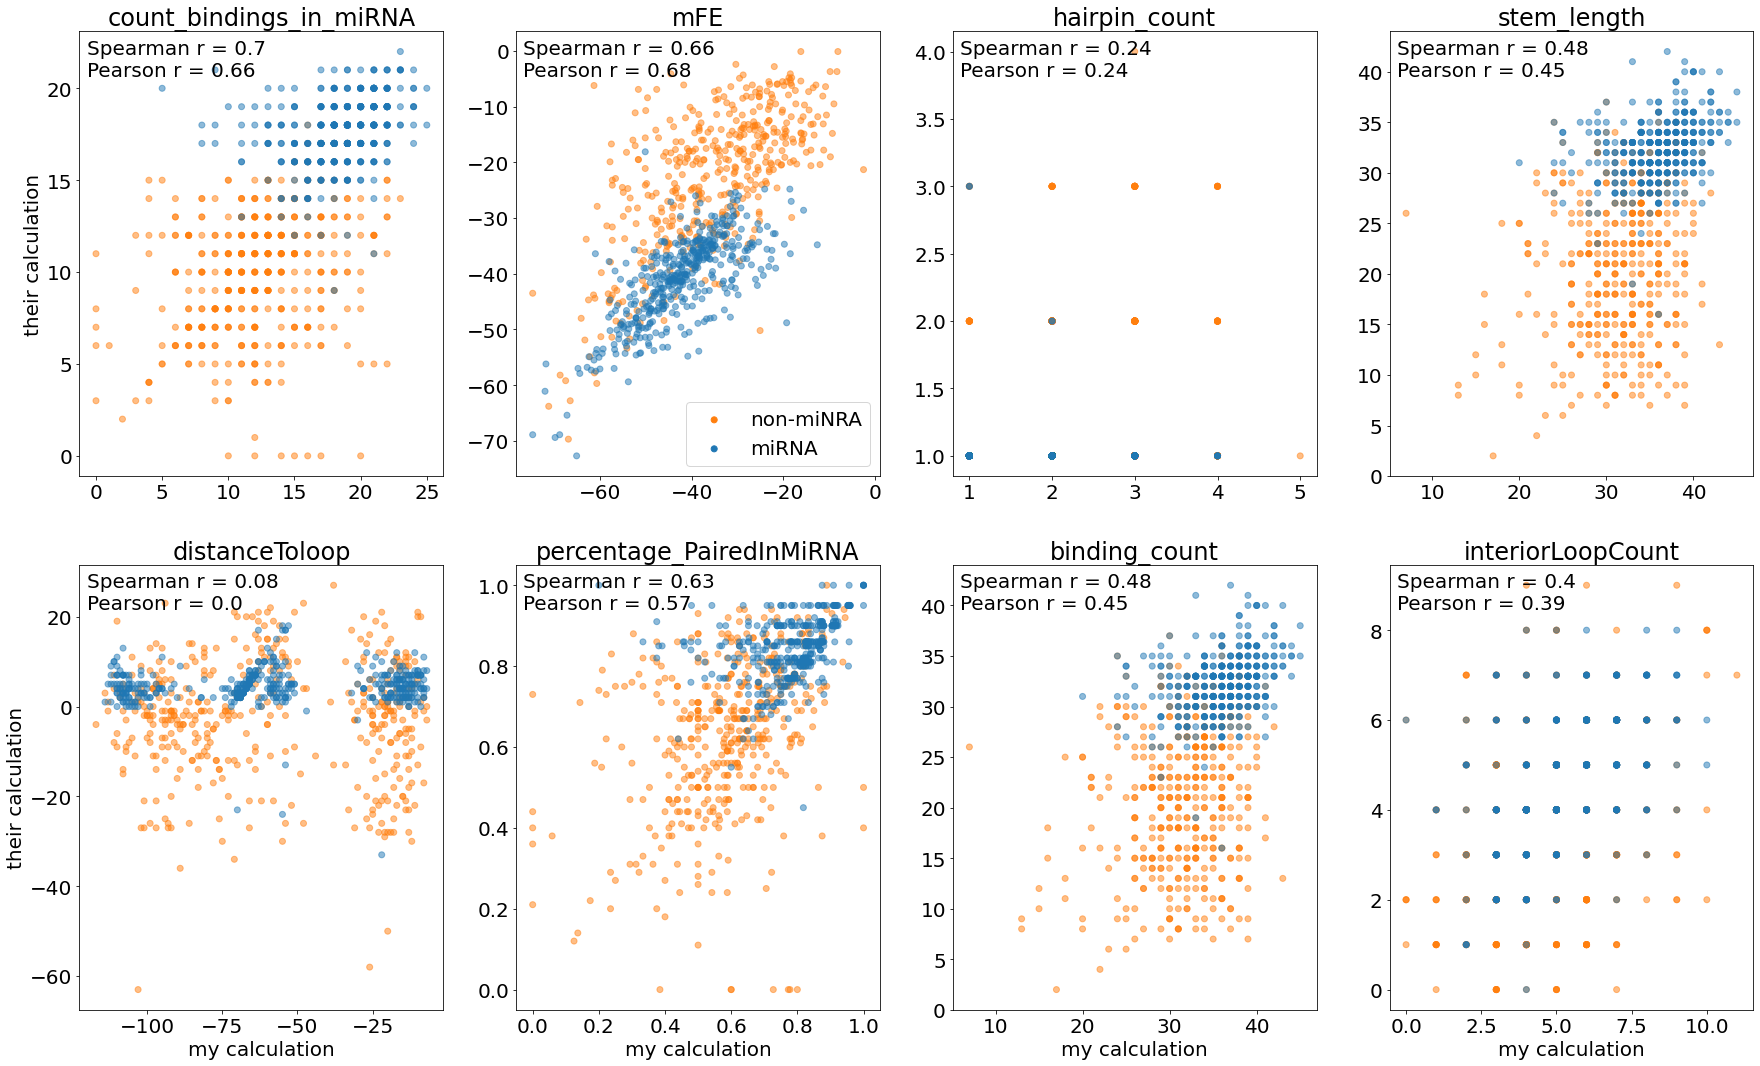

In [157]:
fig, axes = plt.subplots(2, 4, figsize = (30, 18))
label_colors = {1: 'tab:blue', -1:'tab:orange'}
scatter_labels = {1 : 'miRNA', -1:'non-miNRA'}
for i, ax in enumerate(axes.flatten()):
    for label in [-1, 1]:
        ldf = df[df['realMicRNA'] == label]
        ax.scatter(ldf[features[i]], ldf[features[i][:-2]], alpha = 0.5, color=[label_colors[label] for label in ldf['realMicRNA']], label=scatter_labels[label])
    if i in range(4, 8):
        ax.set_xlabel('my calculation')
    if i in [0, 4]:
        ax.set_ylabel('their calculation')
    ax.set_title(features[i][:-2])
    correlation_text = "Spearman r = {Spearman}\nPearson r = {Pearson}".format(Spearman=round(stats.spearmanr(df[features[i]], df[features[i][:-2]]).correlation, 2), 
                                                                               Pearson=round(stats.pearsonr(df[features[i]], df[features[i][:-2]])[0], 2))
    ax.text(.02, .9, correlation_text, size=20, transform=ax.transAxes)
    if i == 1:
        leg = ax.legend()
        for lh in leg.legendHandles: 
            lh.set_alpha(1)